<a href="https://colab.research.google.com/github/Ashishat404/Data-Science/blob/main/California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset directly from Colab's internal storage
# (This bypasses the blocked download server!)
train_path = "/content/sample_data/california_housing_train.csv"
df = pd.read_csv(train_path)

# 3. View the first 5 rows
print("Dataset Loaded Successfully from Local Storage!")
df.head()

Dataset Loaded Successfully from Local Storage!


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


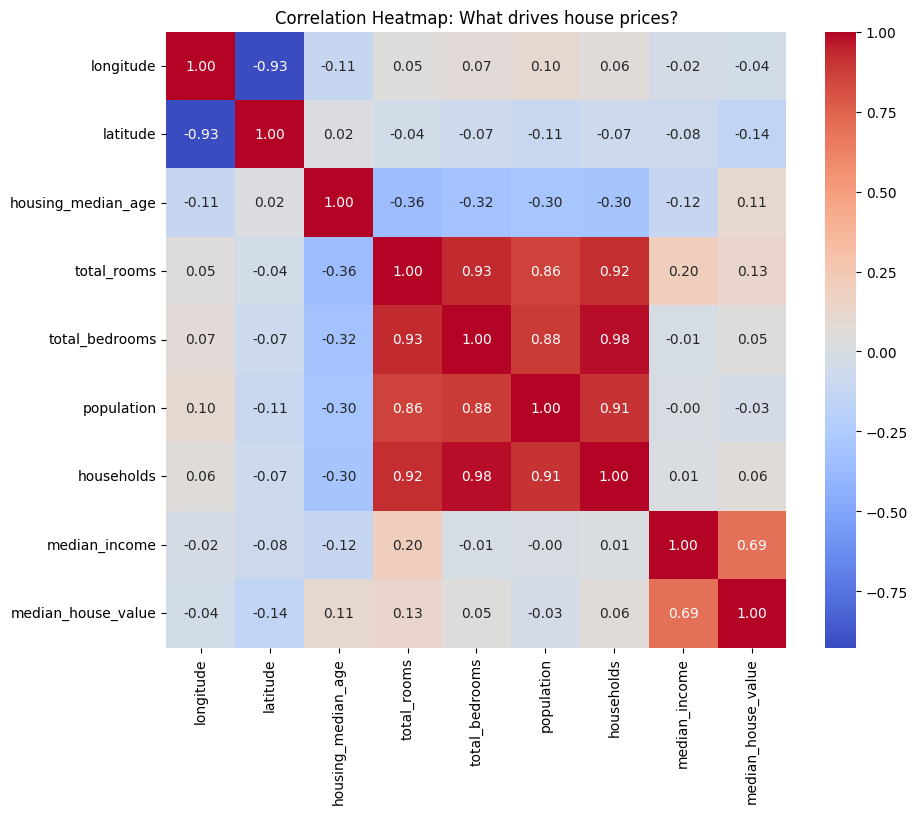

In [4]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: What drives house prices?")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# 1. Select the features (X) and the target (y)
# We drop the price column from X because that's the answer!
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# 2. Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Verify the split
print(f"Training data shape: {X_train.shape} (We teach with this)")
print(f"Testing data shape: {X_test.shape} (We test with this)")


Training data shape: (13600, 8) (We teach with this)
Testing data shape: (3400, 8) (We test with this)


In [7]:
from sklearn.linear_model import LinearRegression

# 1. Initialize the "brain" (Linear Regression Model)
model = LinearRegression()

# 2. Train the model (The "Fit" step)
# The AI looks at X_train (features) and y_train (answers) to learn the patterns
model.fit(X_train, y_train)

# 3. Test the model
# We give it the "Exam" (X_test) and compare its guesses to the real answers (y_test)
score = model.score(X_test, y_test)

print(f"Model R² Score: {score:.4f}")
print("(1.0 means Perfect Prediction, 0.0 means Random Guessing)")

Model R² Score: 0.6636
(1.0 means Perfect Prediction, 0.0 means Random Guessing)


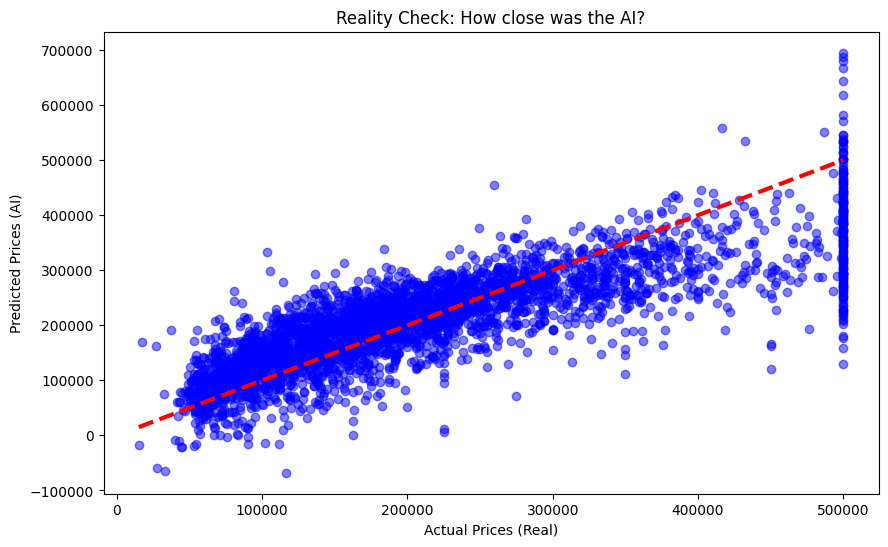

In [8]:
# 1. Ask the model to predict prices for the test set
predictions = model.predict(X_test)

# 2. Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')

# 3. Draw the "Perfect Prediction" line (Red)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)

plt.xlabel("Actual Prices (Real)")
plt.ylabel("Predicted Prices (AI)")
plt.title("Reality Check: How close was the AI?")
plt.show()